In [1]:
import yfinance as yf
ticker = "KULR"

def get_last_reverse_split_date(ticker):
    stock = yf.Ticker(ticker)
    splits = stock.splits
    if splits.empty:
        return "None"
    # Reverse splits have split ratio < 1
    reverse_splits = splits[splits < 1]
    if reverse_splits.empty:
        return "None"
    return reverse_splits.index[-1].strftime('%Y-%m-%d')

get_last_reverse_split_date(ticker)


'2025-06-23'

In [2]:
import yfinance as yf
import pandas as pd

def daily_returns_after_reverse_split(ticker):
    stock = yf.Ticker(ticker)
    splits = stock.splits
    if splits.empty:
        print("No split data found for this ticker.")
        return None
    # Find reverse splits (ratio < 1)
    reverse_splits = splits[splits < 1]
    if reverse_splits.empty:
        print("No reverse splits found for this ticker.")
        return None
    # Get the most recent reverse split date
    last_split_date = reverse_splits.index[-1]
    # Define the period: 3 months after the split
    start = last_split_date
    end = last_split_date + pd.DateOffset(months=3)
    # Download historical data
    hist = stock.history(start=start, end=end)
    if hist.empty:
        print("No price data available for the period after the reverse split.")
        return None
    # Calculate daily returns
    hist['Daily Return'] = hist['Close'].pct_change()
    # Drop the first row (NaN return)
    daily_returns = hist['Daily Return'].dropna()
    return daily_returns

returns = pd.DataFrame(daily_returns_after_reverse_split(ticker))

returns

,Daily Return
Date,
2025-06-24 00:00:00-04:00,-0.022422
2025-06-25 00:00:00-04:00,-0.203364
2025-06-26 00:00:00-04:00,-0.003839
2025-06-27 00:00:00-04:00,0.233141


In [3]:
import pandas as pd
import yfinance as yf

def get_nasdaq_tickers(limit=None):
    url = "https://raw.githubusercontent.com/datasets/nasdaq-listings/main/data/nasdaq-listed-symbols.csv"
    nasdaq_df = pd.read_csv(url)
    tickers = nasdaq_df['Symbol'].dropna()
    tickers = [str(ticker).strip() for ticker in tickers if str(ticker).strip() != ""]
    if limit:
        tickers = tickers[:limit]
    return tickers

def daily_returns_after_reverse_split(ticker):
    stock = yf.Ticker(ticker)
    splits = stock.splits
    if splits.empty:
        return None
    reverse_splits = splits[splits < 1]
    if reverse_splits.empty:
        return None
    last_split_date = reverse_splits.index[-1]
    start = last_split_date - pd.DateOffset(days=10)
    end = last_split_date + pd.DateOffset(days=10)
    try:
        hist = stock.history(start=start, end=end, auto_adjust=True)
    except Exception as e:
        print(f"{ticker}: {e}")
        return None
    if hist.empty or 'Close' not in hist.columns:
        return None
    hist['Daily Return'] = hist['Close'].pct_change()
    if last_split_date not in hist.index:
        split_pos = hist.index.searchsorted(last_split_date)
    else:
        split_pos = hist.index.get_loc(last_split_date)
    daily_returns = hist['Daily Return'].iloc[1:]
    aligned_index = range(-split_pos + 1, -split_pos + 1 + len(daily_returns))
    daily_returns.index = aligned_index
    return daily_returns

# Example usage for the first 10 tickers
nasdaq_tickers = get_nasdaq_tickers(limit=4800)
results = {}
for ticker in nasdaq_tickers:
    returns = daily_returns_after_reverse_split(ticker)
    if returns is not None:
        results[ticker] = returns

returns_df = pd.DataFrame.from_dict(results, orient='index')

print(returns_df)


AACBR: Period 'max' is invalid, must be of the format 1d, 5d, etc.
ABLLW: Period 'max' is invalid, must be of the format 1d, 5d, etc.
ABLVW: Period 'max' is invalid, must be of the format 1d, 5d, etc.
ABPWW: Period 'max' is invalid, must be of the format 1d, 5d, etc.
ABVEW: Period 'max' is invalid, must be of the format 1d, 5d, etc.
ACONW: Period 'max' is invalid, must be of the format 1d, 5d, etc.
ADNWW: Period 'max' is invalid, must be of the format 1d, 5d, etc.
ADSEW: Period 'max' is invalid, must be of the format 1d, 5d, etc.
ADVWW: Period 'max' is invalid, must be of the format 1d, 5d, etc.
AENTW: Period 'max' is invalid, must be of the format 1d, 5d, etc.
AERTW: Period 'max' is invalid, must be of the format 1d, 5d, etc.
AEVAW: Period 'max' is invalid, must be of the format 1d, 5d, etc.
AFJKR: Period 'max' is invalid, must be of the format 1d, 5d, etc.
AFRIW: Period 'max' is invalid, must be of the format 1d, 5d, etc.
AIFER: Period 'max' is invalid, must be of the format 1d, 5d, 

            -6        -5        -4        -3        -2        -1         0  \
AAON -0.103450  0.115387 -0.068967  0.037038  0.000000  0.035715 -0.034484   
ABUS  0.051282 -0.016260 -0.008264 -0.025000 -0.025641  0.000000  0.087719   
ACHV -0.115385  0.065217  0.000000  0.163265  0.228070 -0.142857  0.135833   
ACLS  0.029412 -0.050000 -0.052632  0.023810  0.019380  0.022814  0.015799   
ACON  0.058201 -0.062500  0.026667 -0.029870 -0.230254 -0.092174 -0.140060   
...        ...       ...       ...       ...       ...       ...       ...   
KTTA       NaN       NaN       NaN -0.053118 -0.048780 -0.051282  0.087838   
LDWY       NaN       NaN       NaN  0.172414 -0.098039 -0.086957  0.243197   
TURN       NaN       NaN       NaN -0.018868  0.028846  0.037383 -0.025526   
APLD       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
FORA       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

             1         2         3         4         5         

In [4]:
returns_df
import os

# Get the user's desktop path
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')

# Ensure the Desktop directory exists
if not os.path.isdir(desktop_path):
    raise OSError(f"Desktop directory does not exist: {desktop_path}")

# Set the filename and full path
file_path = os.path.join(desktop_path, 'returns_df2.csv')

# Save the DataFrame to CSV
returns_df.to_csv(file_path)

print(f"Saved returns_df to: {file_path}")


Saved returns_df to: /Users/nshaffer/Desktop/returns_df2.csv


In [5]:
import pandas as pd

# Assuming returns_df is your DataFrame: rows=tickers, columns=days after split

# Calculate mean, std, and skew for each day (i.e., for each column)
summary_df = pd.DataFrame({
    'mean': returns_df.mean(axis=0, skipna=True),
    'std': returns_df.std(axis=0, skipna=True),
    'skew': returns_df.skew(axis=0, skipna=True)
})

print(summary_df)


        mean       std       skew
-6 -0.003507  0.095720   5.072701
-5 -0.003056  0.123023  -2.909268
-4 -0.003045  0.096825   2.353147
-3 -0.006364  0.109198   4.250076
-2 -0.040841  0.127241  -0.666663
-1 -0.023999  0.131093   0.316361
 0  0.046188  1.054190  12.152043
 1  0.076659  1.276448  15.934452
 2  0.075779  1.545764  23.098449
 3  0.010689  0.199725   8.463331
 4  0.008786  0.182707  12.210504
 5  0.011353  0.246546  13.431180
 6  0.006821  0.116851   5.937125
 7 -0.003283  0.093088   2.389451
-7 -0.001135  0.095939   5.551780


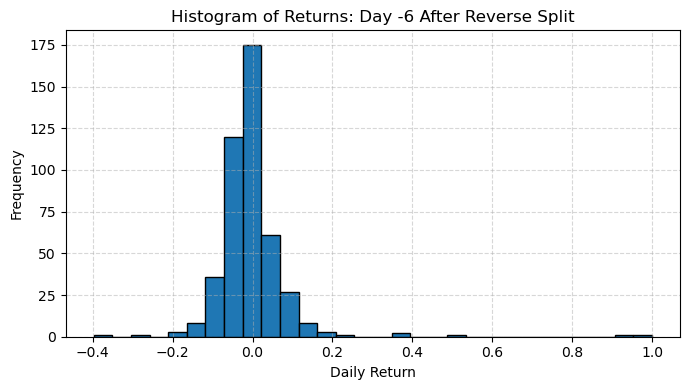

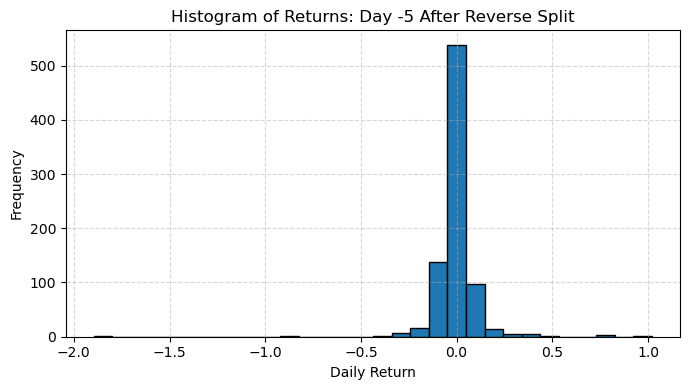

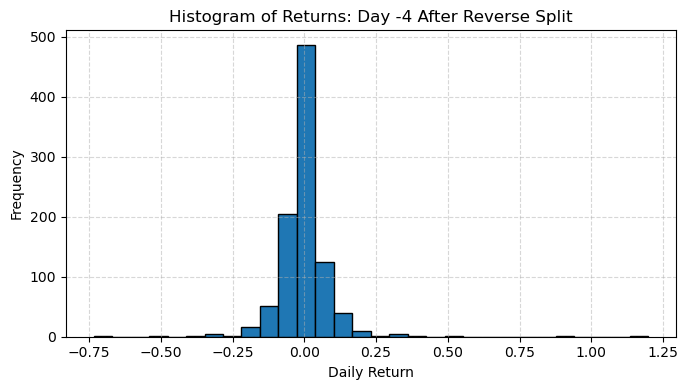

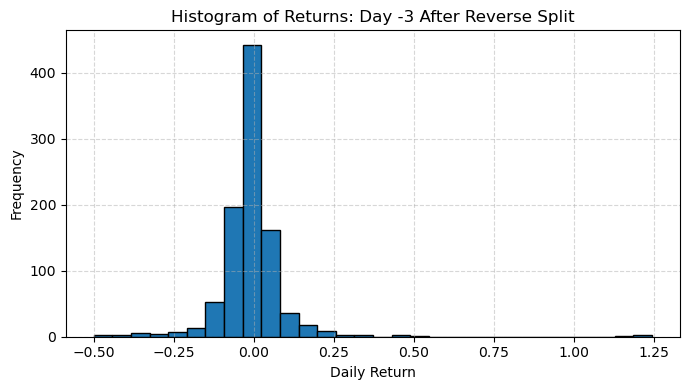

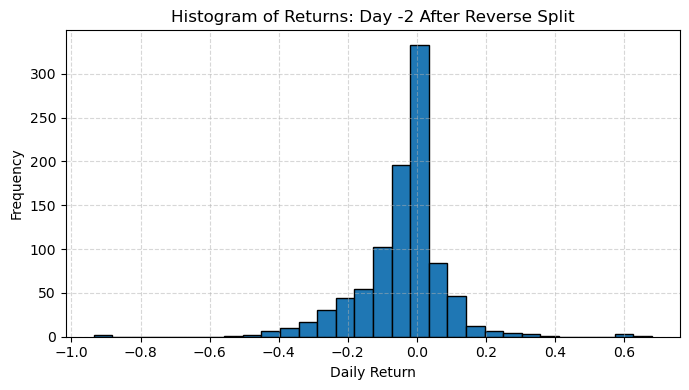

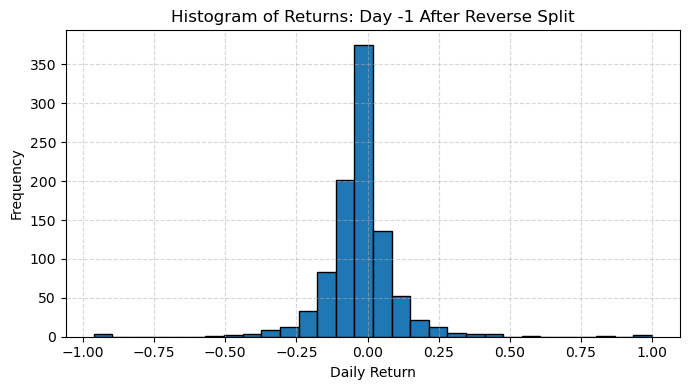

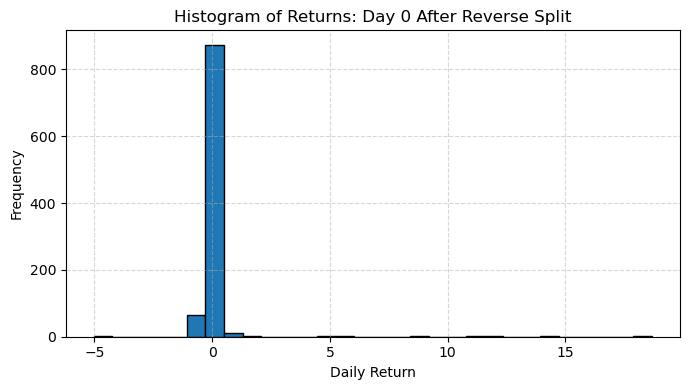

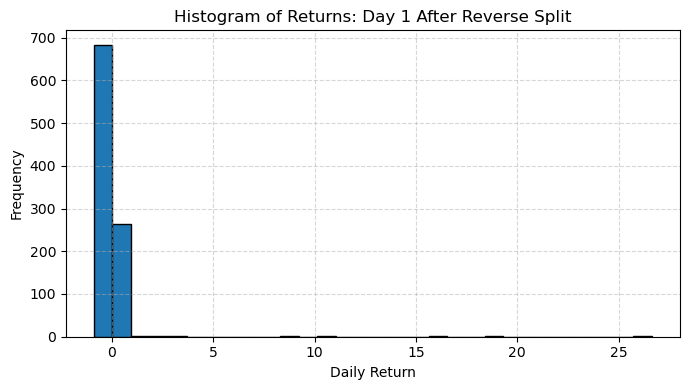

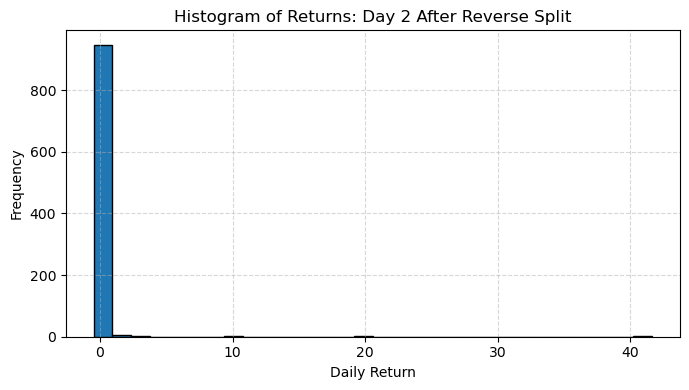

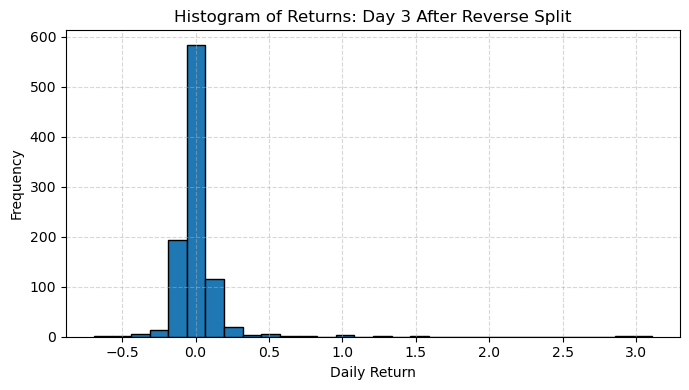

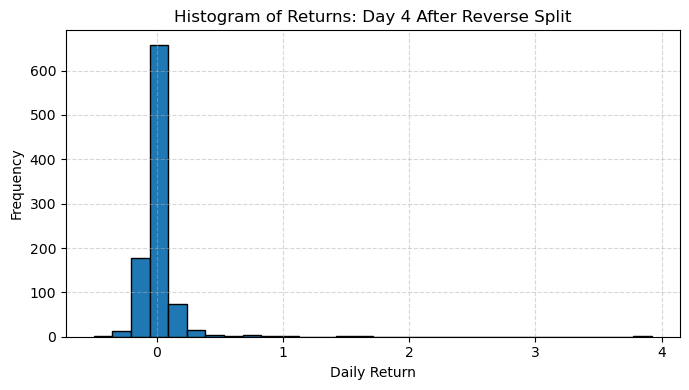

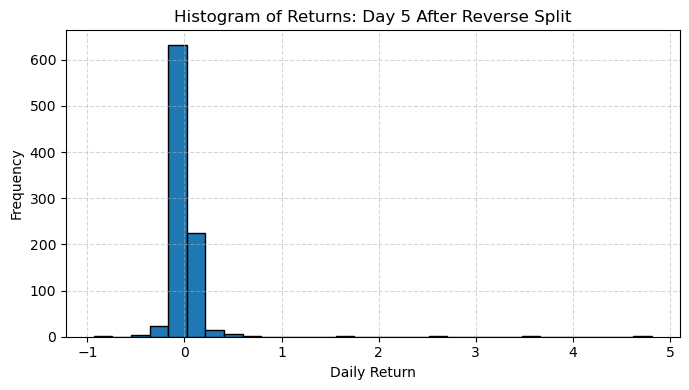

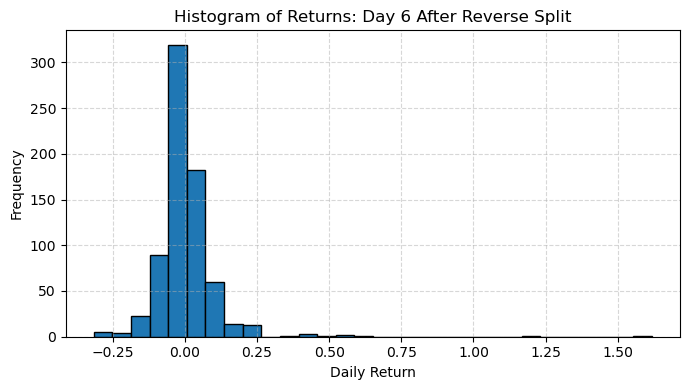

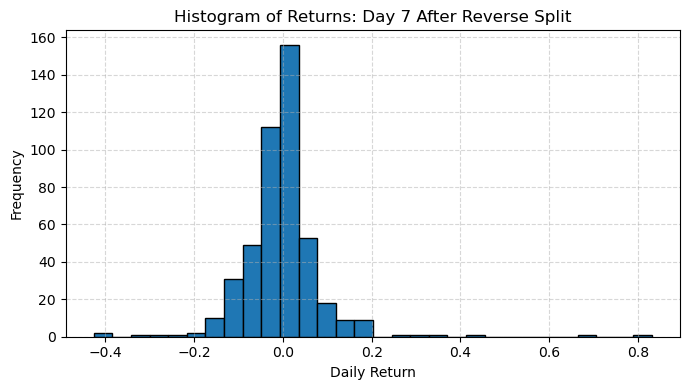

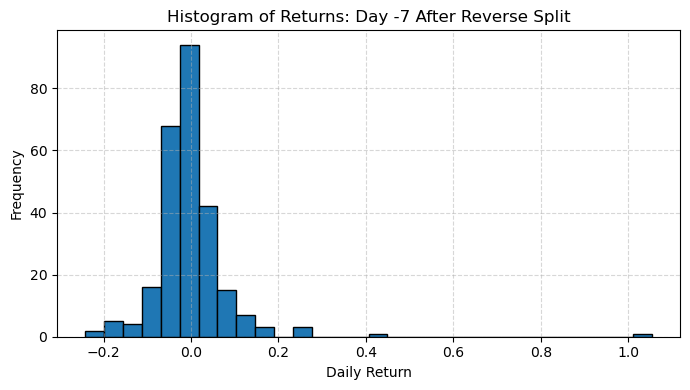

In [6]:
import matplotlib.pyplot as plt

# returns_df: rows = stocks, columns = days after split

for day in returns_df.columns:
    plt.figure(figsize=(7, 4))
    plt.hist(returns_df[day].dropna(), bins=30, edgecolor='black')
    plt.title(f"Histogram of Returns: Day {day} After Reverse Split")
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
